# Big picture

## Understanding what constitutes a times series
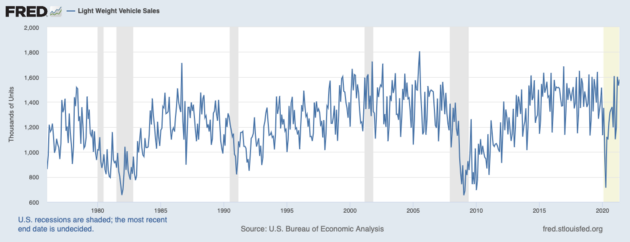
* A time series is just how a variable changes over time
* There are two major components to this
    * Trend
        * the general movement over time
    * Seasonality
        * changes in behaviour in the course of a single season
* e.g.
    * most monthly smapled data have yearly seasonality -> some patterns repeat in certain months every year regardless of trend


<u> Breaking it down </u>
* You can decompose any time series into <b> trend, seasonal, and residual components </b> with Python.
* light weight vehicle sales decomposition
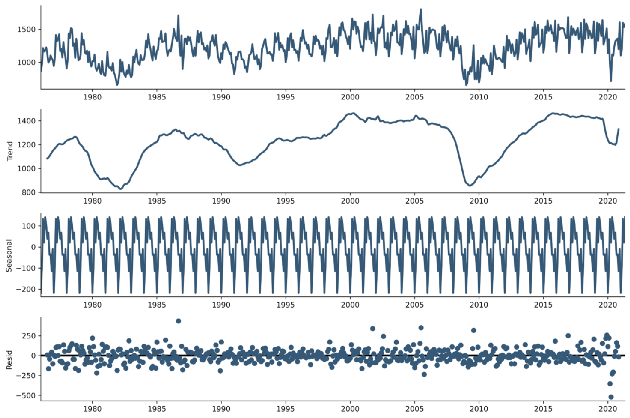
* the plot consists four components
    * the original time series (1)
    * trend (2), seasonality (3), residuals (4)

## Where are time series used

### Pattern Analysis
* charts are easy to look at and spot patterns but harder to analyze directly
* we can use the Stumpy library !

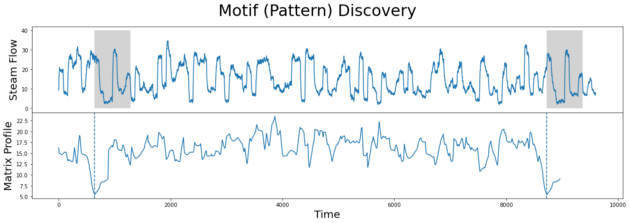

pattern finding with python and stumpy

### Anomaly detection
* Stumpy can help detect anomalies i.e. any value that's severely different from anything you'd expect
* detecting anomalies in normally distributed values is pretty easy
* but itmes series data often isn't normally distributed so it's more difficult

### General Forecasting
* There are a lot of forecasting techniques available
    * i.e. AR
    * MA
    EXSM
    * ARMA, ARIMA, SARIMA, 
    * SARIMAX
    * VAR , VARMA
    * RNN
    * LTSM
    * GRU
    
### Librairies for Time Series Analysis
* Pandas
* Statsmodel
    * used for statistical modelling
    * allows you to use stat models ranging from simple oving average to seasonal and vector autoregression
    * can use it to test for stationarity
* scikit-learn
    * general ML library for python
    * any regression algorithms can be used for time series forecasting if a time series is reframed as a supervised machine learning problem
* tensorflow
    * most popular deep learning lib for python
    * esp for RNN, LSTM
* prophet
    * times forecasting library from facebook
    * based on additive models
    * also has a related library called Neural Prophet
* stumpy
    * Python library that efficiently computes the matrix profile, which can then be used for pattern and anomaly detection, among other things.
* PyCaret
    * lib for automated ML
    * supports time eries too!

--
# Time series with Pandas
## Objectives
* Learn how to work with datetimes, 
* how to apply basic time series operations  
* the ins and outs of visualizing time series data.

## Introduction to DateTimes
* built-in library `datetime` with some useful submodules like `datetime` and `timedelta`

In [1]:
from datetime import datetime, timedelta


# Arbitrary date
print('Arbitrary date: ', end=' ')
print(datetime(year=2021, month=5, day=15))

# Arbitary date and time
print('Date and time:  ', end=' ')
print(datetime(year=2021, month=5, day=15, hour=7, minute=23, second=44))

# Now
print('Date right now: ', end=' ')
print(datetime.now())

# Yesterday
print('Date yesterday: ', end=' ')
print(datetime.now() - timedelta(days=1))

Arbitrary date:  2021-05-15 00:00:00
Date and time:   2021-05-15 07:23:44
Date right now:  2021-08-03 00:38:54.814343
Date yesterday:  2021-08-02 00:38:54.814544


In [2]:
now = datetime.now()
print(now.year, now.month, now.day, now.hour, now.minute, now.second )

2021 8 3 0 38 54


## Working with Date Ranges
* You can work with pure python, numpy or pandas
* pandas is generally the simplest but let's see them all

### Pure Python

In [3]:
date_list = [ datetime(2021,7,1),
             datetime(2021,7,2),
             datetime(2021,7,3)
            ]
date_list

[datetime.datetime(2021, 7, 1, 0, 0),
 datetime.datetime(2021, 7, 2, 0, 0),
 datetime.datetime(2021, 7, 3, 0, 0)]

### Numpy
* allows you to specify date ranges as an array of strings
* and data type spec like `datetime64`

In [4]:
import numpy as np
date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64')
date_list

array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[D]')

* The upper letter D in the data type specification tells that dates are stored in daily intervals (or daily precision). 
* You can change that upon declaration. The following code snippet will add default values for hour, minute, and second:

In [5]:
date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[s]')

In [6]:
## precision in seconds
date_list

array(['2021-07-01T00:00:00', '2021-07-02T00:00:00',
       '2021-07-03T00:00:00'], dtype='datetime64[s]')

In [7]:
## precision in years?
date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[Y]')
date_list

array(['2021', '2021', '2021'], dtype='datetime64[Y]')

when you specify years, you lose month and day data completely

### Pandas
* has inbuilt `date_range()` function that allows you to construct date ranges in multiple ways

In [8]:
import pandas as pd

date_list = pd.date_range(start='2021-07-01', end='2021-07-05')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05'],
              dtype='datetime64[ns]', freq='D')

* we can also specify the starting date only
    * this requires two additional parameters
        * `periods: int`  - how many periods should the date range have inc starting value
        * `freq: str`  - specifies the interval level

In [9]:
## declare a 10-day long daily date range
date_list = pd.date_range(start='2021-07-01', periods=10, freq='D')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10'],
              dtype='datetime64[ns]', freq='D')

In [10]:
## other useful functions: max and min

print(f'Minimum date: {date_list.min()}')
print(f'Maximum date: {date_list.max()}')

Minimum date: 2021-07-01 00:00:00
Maximum date: 2021-07-10 00:00:00


## Time Series Resampling, Shifting, Rolling, and Differencing
* sometimes the data you have isn't quite in the format you want
* say you need monthly intervals but its in daily intervals
* let's test out with a dataset

In [11]:
df = pd.read_csv('../data/LTOTALNSA.csv',index_col='DATE', parse_dates=True)

In [12]:
df

,LTOTALNSA
DATE,
1976-01-01,864.600
1976-02-01,973.300
1976-03-01,1216.100
1976-04-01,1163.200
1976-05-01,1176.100
...,...
2021-02-01,1192.902
2021-03-01,1595.330
2021-04-01,1520.167


### Resampling
* this allows us to change the aggregation level of a time series i.e. its intervals

In [13]:
# changing our monthly dataset to yearly totals
yearly_totals = df.resample(rule='Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


In [14]:
## quarterly averages
quarterly_means = df.resample(rule='Q').mean()
quarterly_means.head()

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


### Shifting
* here we can use the `shift()` function
* this allows us to shift the entire series up or down by the desired number of periods

In [15]:
df_shift = df.copy()
df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)
df_shift.head()

,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


* The same can be done at the other end of the dataset. 
* There’s no unshift function, so you’ll have to shift the series by a negative value:

In [16]:
df_shift = df.copy()
df_shift['Shift_Neg1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Shift_Neg2'] = df_shift['LTOTALNSA'].shift(-2)
df_shift.tail()

,LTOTALNSA,Shift_Neg1,Shift_Neg2
DATE,,,
2021-02-01,1192.902,1595.330,1520.167
2021-03-01,1595.330,1520.167,1583.093
2021-04-01,1520.167,1583.093,1296.517
2021-05-01,1583.093,1296.517,NaN
2021-06-01,1296.517,NaN,NaN


In [17]:
df_shift

,LTOTALNSA,Shift_Neg1,Shift_Neg2
DATE,,,
1976-01-01,864.600,973.300,1216.100
1976-02-01,973.300,1216.100,1163.200
1976-03-01,1216.100,1163.200,1176.100
1976-04-01,1163.200,1176.100,1224.900
1976-05-01,1176.100,1224.900,1130.100
...,...,...,...
2021-02-01,1192.902,1595.330,1520.167
2021-03-01,1595.330,1520.167,1583.093
2021-04-01,1520.167,1583.093,1296.517


### Rolling
* time series data can often be quite volatile
* the concept of rolling or moving averages is a useful technique for smoothing time series data
* you can also make forecasts with moving averages

* now lets calculate quarterly and yearly moving averages from the original series

In [18]:
df_rolling = df.copy()
df_rolling['QuarterRolling'] = df_rolling['LTOTALNSA'].rolling(window=3).mean()
df_rolling['YearRolling'] = df_rolling['LTOTALNSA'].rolling(window=12).mean()
df_rolling.head(15)

,LTOTALNSA,QuarterRolling,YearRolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


### Differencing

* useful esp for financial data and want to calculate returns
* vital in making the series <b> stationary </b>

In [20]:
## calculate first and second order differences
df_diff = df.copy()
df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods=1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods=2)
df_diff.head()

# First order:   973.3 - 864.6 = 108.7
# Second order: 1216.1 - 864.6 = 351.5

,LTOTALNSA,Diff_1,Diff_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,108.7,NaN
1976-03-01,1216.1,242.8,351.5
1976-04-01,1163.2,-52.9,189.9
1976-05-01,1176.1,12.9,-40.0


## Visualising time series data

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

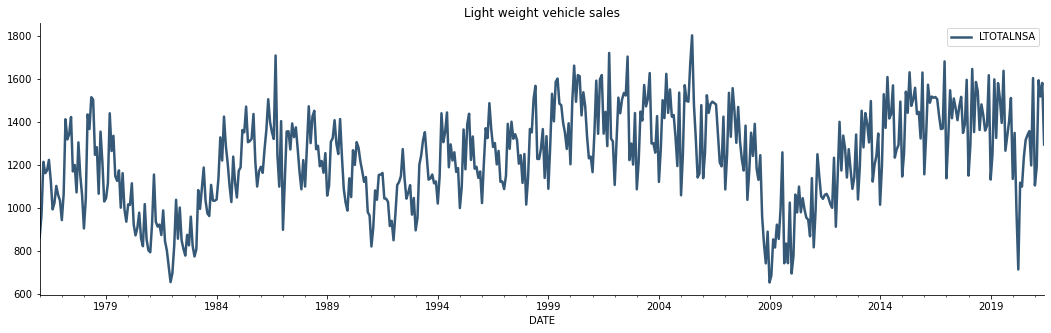

In [22]:
df.plot(figsize=(18, 5), title='Light weight vehicle sales');

But what if you want to visualize only a specific subset? Well, since you’re dealing with the datetime index, you can use Python’s slicing notation. The following code snippet will visualize only the data from 1990 to 2005:

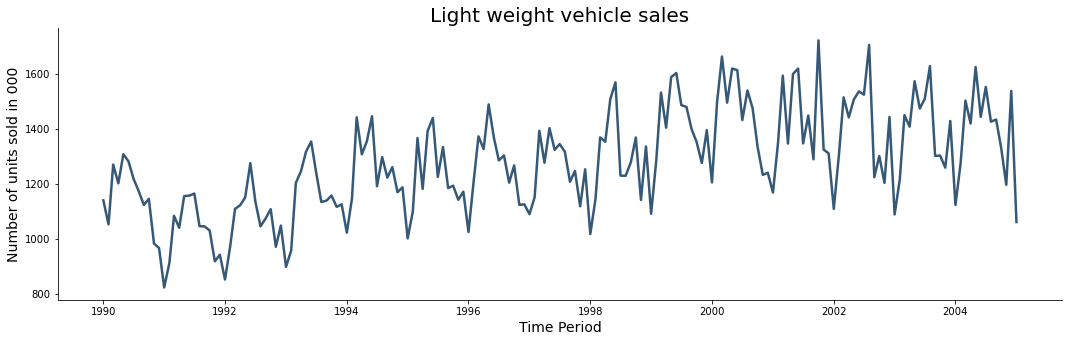

In [23]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']['1990-01-01':'2005-01-01']);

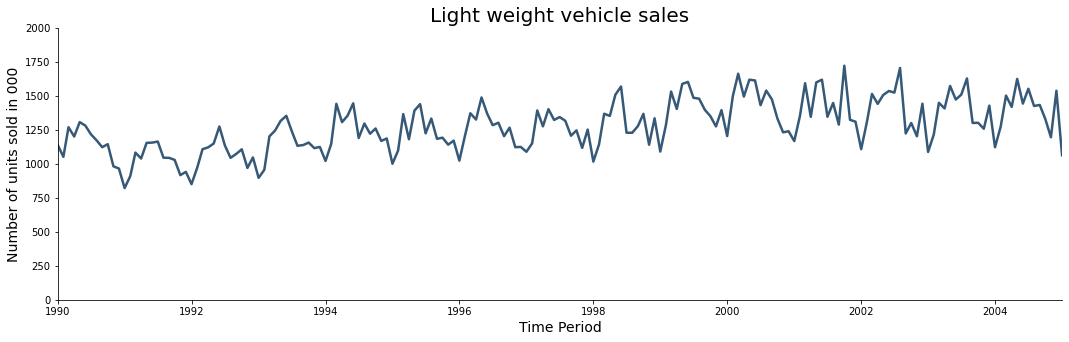

In [24]:
# you can also use the xlim() and ylim() functions
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.xlim(np.array(['1990-01-01', '2005-01-01'], dtype='datetime64'))
plt.ylim([0, 2000])

plt.plot(df['LTOTALNSA']);